### As always, import the basic libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import env
import acquire

import matplotlib.pyplot as plt
import seaborn as sns

#### Load Titanic dataset from my functions in VSCode

In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


#### Now, on with the show!

**Be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.**

**For all of the models you create, choose a threshold that optimizes for accuracy.**

### Q1:
Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one (the model from the mini_exercise)?

In [3]:
X = df[["fare" , "pclass", "age"]]
y = df[["survived"]]

train, test = train_test_split(df, random_state=123, train_size=.8)

In [4]:
X = train[["fare", "pclass", "age"]]
y = train[["survived"]]

#### Assign the model object:

In [5]:
model = LogisticRegression(random_state=123).fit(X, y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Ruh-Roh.  Looks like we've got do do some cleaning up:

In [ ]:
df.dropna()

In [ ]:
model = LogisticRegression(random_state=123).fit(X, y)

#### Nope.  Still having problems.  Let's take a look at the date from both:

In [ ]:
df.info()

In [ ]:
train.info()

#### Looks like 'sex' is a string, and 'age' has lots of null values, one, and two: is a float.  We need integers to get the model going:

In [6]:
train = train["age"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

#### Based on the ValueError above, we're gonna have to do some imputin'...

- import the libraries I need

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [8]:
df.age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

#### Okay, looks like age has 177 NaN values.  Too many to just drop.

**Visualize age without nulls:**

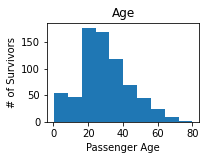

In [9]:
plt.subplot(221)
plt.hist(df.age.dropna())
plt.title("Age")
plt.xlabel("Passenger Age")
plt.ylabel("# of Survivors")
plt.show()

**Now to impute missing values**

- Create Imputer object

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

#### Next, I have to impute the mean age into the NaN values in 'age':

In [11]:
imputer = imputer.fit(train[["age"]])

In [12]:
train[["age"]] = imputer.transform(train[["age"]])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### Now to reassign Xs and y:

In [13]:
X = train[["fare", "pclass", "age"]]
y = train[["survived"]]

In [14]:
model = LogisticRegression(random_state=123).fit(X, y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
model.classes_

array([0, 1])

In [16]:
pd.DataFrame(model.predict_proba(X), columns=model.classes_)

,0,1
0,0.241564,0.758436
1,0.768253,0.231747
2,0.843136,0.156864
3,0.704084,0.295916
4,0.281843,0.718157
...,...,...
707,0.603107,0.396893
708,0.582271,0.417729
709,0.773973,0.226027
710,0.762688,0.237312


In [17]:
train["yhat"] = model.predict(X)
train["p_survived"] = model.predict_proba(X)[:, 1]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Since we're now scoring, we have to import the accuracy, precision, and recall scores library:


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
model.score(X, y)

0.6966292134831461

In [20]:
accuracy_score(train.survived, train.yhat)

0.6966292134831461

In [21]:
precision_score(train.survived, train.yhat)

0.6763005780346821

In [22]:
recall_score(train.survived, train.yhat)

0.4223826714801444

#### Comparing the two, this exercise and the score results from the mini-exercise:

- model score from mini exercise = 0.672752808988764
- model score from this exercise (adding 'age') = 0.6966292134831461

- accuracy score from mini exercise = 0.672752808988764
- accuracy score from this exercise (adding 'age') = 0.6966292134831461

- precision_score from mini exercise = 0.6325301204819277
- precision score from this exercise (adding 'age) = 0.6763005780346821

- recall score from mini exercise = 0.37906137184115524
- recall score from this exercise (adding 'age) = 0.4223826714801444

#### To answer the question, by adding the 'age' variable (a categorical), we improve our model_score, accuracy_score, precision_score, and recall_score, so YES, the model using 'age' DOES perform better.

### 2. Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [23]:
X = df[["fare" , "pclass", "age", "sex"]]
y = df[["survived"]]

In [24]:
X.shape

(891, 4)

In [25]:
y.shape

(891, 1)

In [26]:
train, test = train_test_split(df, random_state=123, train_size=.8)

In [27]:
X = train[["fare", "pclass", "age", "sex"]]
y = train[["survived"]]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 329 to 510
Data columns (total 13 columns):
passenger_id    712 non-null int64
survived        712 non-null int64
pclass          712 non-null int64
sex             712 non-null object
age             564 non-null float64
sibsp           712 non-null int64
parch           712 non-null int64
fare            712 non-null float64
embarked        710 non-null object
class           712 non-null object
deck            155 non-null object
embark_town     710 non-null object
alone           712 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 77.9+ KB


#### "Sex," of course, is full of strings, and we need integers to make our models work, so we'll have to encode those strings into OneHots so the values have minimal weight on the overall model (they'll have values of either 1 or 0)

- import the encoding library

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [30]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [31]:
train.sex.value_counts()

male      461
female    251
Name: sex, dtype: int64

#### Create the LabelEncoder object

In [32]:
encoder = LabelEncoder() # 'LabelEncoder' is stored in the variable 'encoder'

encoder.fit(train.sex) # fixes LabelEncoder to the 'sex' column in the trianing df

train.encoded = encoder.transform(train.sex)
test.encoded = encoder.transform(test.sex)

print(type(train.encoded))

train.encoded[0:10] # prints the first 10 values (encoded are in there) of the sex column

<class 'numpy.ndarray'>


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

#### Now to convert training df to 2-dimensions for OneHot using '.reshape.'

In [33]:
train_array = np.array(train.encoded).reshape(len(train.encoded), 1)
test_array = np.array(test.encoded).reshape(len(test.encoded), 1)

#### Create OneHot object, and fit / transform it onto both train and test arrays

In [34]:
ohe = OneHotEncoder(sparse=False, categories="auto")

# fix and transform to train:

train_ohe = ohe.fit_transform(train_array)

# transform on test array:

test_ohe = ohe.transform(test_array)

#### In acquire.py, I created a function called 'encode' that turns the array of these new values - train_ohe and test_ohe - into a df with column names being the values and the index matching that of the train / test.  Then merges (joins) the new encoded dataframe with the existing train/test dataframe  

In [35]:
train, test = acquire.encode(train, test, col_name = "sex")

In [37]:
#LOST - REDO EXERCISE BASE ON ZACH'S NOTES

### Decision Tree Exercises

**Load the new libraries we need**

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### 1.) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [3]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
species_id      150 non-null int64
species_name    150 non-null object
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Don't need to encode any of the features because they're all ints/floats.  Only thing that's an object is our y, the species_name

In [5]:
# Adding two columns, 'petal_area' and 'sepal_area'

df["petal_area"] = df.petal_width * df.petal_length
df["sepal_area"] = df.sepal_width * df.sepal_length

In [6]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
0,1,setosa,5.1,3.5,1.4,0.2,0.28,17.85
1,1,setosa,4.9,3.0,1.4,0.2,0.28,14.70
2,1,setosa,4.7,3.2,1.3,0.2,0.26,15.04
3,1,setosa,4.6,3.1,1.5,0.2,0.30,14.26
4,1,setosa,5.0,3.6,1.4,0.2,0.28,18.00


#### Checks out: the two new columns were added

**drop species_name from the df b/c that's our target.  Right now, we're just looking at varialbles**

In [7]:
X = df.drop(["species_name", "species_id"], axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0.28,17.85
1,4.9,3.0,1.4,0.2,0.28,14.70
2,4.7,3.2,1.3,0.2,0.26,15.04
3,4.6,3.1,1.5,0.2,0.30,14.26
4,5.0,3.6,1.4,0.2,0.28,18.00


#### Create a new dataframe for our target (y), the species name

In [8]:
y = df[["species_name"]]
y.head()

,species_name
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


#### Now time to split the training and testing data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
130,7.4,2.8,6.1,1.9,11.59,20.72
119,6.0,2.2,5.0,1.5,7.50,13.20
29,4.7,3.2,1.6,0.2,0.32,15.04
0,5.1,3.5,1.4,0.2,0.28,17.85
62,6.0,2.2,4.0,1.0,4.00,13.20


#### Now, I make my thing (a new, blank ML model of a specific kind):

In [10]:
clf = DecisionTreeClassifier(class_weight=None, criterion="gini", max_depth=4)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Time to fit and transform the classifier (clf) to the training model:

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Time for some predictions:

In [12]:
# Calculate the predicted probability that the preidction is correct

y_pred = clf.predict(X_train)

y_pred_proba = clf.predict_proba(X_train)


In [13]:
# See if it / how it worked:

y_pred[0:10]

array(['virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

#### 2.) Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [14]:
labels = sorted(y_train.species_name.unique())
predicted_labels = [name + " predicted" for name in labels]
print(f"The labels are {labels}, and")
print(f"the predicted_labels are {predicted_labels}.")

The labels are ['setosa', 'versicolor', 'virginica'], and
the predicted_labels are ['setosa predicted', 'versicolor predicted', 'virginica predicted'].


#### Confusion matrix to check how the model performed

In [15]:
conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])

conf.index.name = "actual"

conf

,setosa predicted,versicolor predicted,virginica predicted
actual,,,
setosa,37,0,0
versicolor,0,44,0
virginica,0,1,38


#### Accuracy (TP + TN / Total Observations)

In [16]:
print(f"Accuracy of the DecisionTreeClassifier on training set = {clf.score(X_train, y_train)}.")

Accuracy of the DecisionTreeClassifier on training set = 0.9916666666666667.


#### Precision, recall, f1 score, and more!

In [17]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.977778,1.000000,0.991667,0.992593,0.991852
recall,1.0,1.000000,0.974359,0.991667,0.991453,0.991667
f1-score,1.0,0.988764,0.987013,0.991667,0.991926,0.991659
support,37.0,44.000000,39.000000,0.991667,120.000000,120.000000


In [18]:
y_test.shape

(30, 1)

#### See how the model perfromed on the test data:

In [19]:
print(f"Accuracy of Decision Tree classifier on test data = {clf.score(X_test, y_test)}.")

Accuracy of Decision Tree classifier on test data = 0.9333333333333333.


#### How to get the y_prediction based on the X_test (or, the actual vs. predicted numbers on the test set):

In [20]:
y_pred = clf.predict(X_test)

labels = sorted(y_train.species_name.unique())

predicted_labels = [name + " predicted" for name in labels]

#### Confusion matrix to see these results:

In [21]:
cnf = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=[predicted_labels])

cnf.index.name = "actual"

cnf

,setosa predicted,versicolor predicted,virginica predicted
actual,,,
setosa,13,0,0
versicolor,0,6,0
virginica,0,2,9


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.75      1.00      0.86         6
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [23]:
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

graph.render("Iris_Decision_Tree", view=True)

'Iris_Decision_Tree.pdf'

#### Now try all this using 'entropy' in lieu of 'gini'

In [24]:
new_clf = DecisionTreeClassifier(class_weight=None, criterion="entropy", max_depth=4)
new_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Time to fit and transform the classifier (new_clf) to the training model:

In [25]:
new_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Time for some predictions:

In [26]:
# Calculate the predicted probability that the preidction is correct

y_pred = new_clf.predict(X_train)

y_pred_proba = new_clf.predict_proba(X_train)

In [27]:
# See if it / how it worked:

y_pred[0:10]

array(['virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

#### Evaluate the 'entropy' in-sample results using the model score, confusion matrix, and classification report.

In [28]:
labels = sorted(y_train.species_name.unique())
predicted_labels = [name + " predicted" for name in labels]
print(f"The labels are {labels}, and")
print(f"the predicted_labels are {predicted_labels}.")

The labels are ['setosa', 'versicolor', 'virginica'], and
the predicted_labels are ['setosa predicted', 'versicolor predicted', 'virginica predicted'].


#### Confusion matrix to check how the model performed

In [32]:
new_conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])

new_conf.index.name = "actual"

new_conf

,setosa predicted,versicolor predicted,virginica predicted
actual,,,
setosa,37,0,0
versicolor,0,44,0
virginica,0,1,38


In [33]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       0.98      1.00      0.99        44
   virginica       1.00      0.97      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [35]:
print(f"Accuracy of the DecisionTreeClassifier on training set = {clf.score(X_train, y_train)}.")

Accuracy of the DecisionTreeClassifier on training set = 0.9916666666666667.


In [36]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.977778,1.000000,0.991667,0.992593,0.991852
recall,1.0,1.000000,0.974359,0.991667,0.991453,0.991667
f1-score,1.0,0.988764,0.987013,0.991667,0.991926,0.991659
support,37.0,44.000000,39.000000,0.991667,120.000000,120.000000


In [37]:
y_test.shape

(30, 1)

In [38]:
print(f"Accuracy of Decision Tree classifier on test data = {clf.score(X_test, y_test)}.")

Accuracy of Decision Tree classifier on test data = 0.9333333333333333.


In [40]:
y_pred = new_clf.predict(X_test)

labels = sorted(y_train.species_name.unique())

predicted_labels = [name + " predicted" for name in labels]

In [41]:
cnf = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=[predicted_labels])

cnf.index.name = "actual"

cnf

,setosa predicted,versicolor predicted,virginica predicted
actual,,,
setosa,13,0,0
versicolor,0,6,0
virginica,0,2,9


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.75      1.00      0.86         6
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30

